# IMPORTIG PACKAGES

In [36]:
#Import all relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# IMPORTING THE DATASET

In [37]:
df=pd.read_csv("basket_analysis.csv")

In [38]:
df.head()

,Unnamed: 0,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,0,False,True,False,False,True,True,False,True,False,False,False,False,True,False,True,True
1,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,True
3,3,False,False,True,True,False,True,False,False,False,True,True,True,False,False,False,False
4,4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df.shape

(999, 17)

In [11]:
df.describe()

,Unnamed: 0
count,999.000000
mean,499.000000
std,288.530761
min,0.000000
25%,249.500000
50%,499.000000
75%,748.500000
max,998.000000


In [12]:
df.isnull()

,Unnamed: 0,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# CREATING A FREQUENT SET

In [13]:
df.drop(df.columns[0],axis=1,inplace=True)

In [14]:
frequent_itemsets = apriori(df,
                            min_support = .006,
                            max_len = 3,
                            use_colnames = True)

In [15]:
frequent_itemsets

,support,itemsets
0,0.383383,(Apple)
1,0.384384,(Bread)
2,0.420420,(Butter)
3,0.404404,(Cheese)
4,0.407407,(Corn)
...,...,...
691,0.098098,"(chocolate, Yogurt, Onion)"
692,0.087087,"(Sugar, Yogurt, Unicorn)"
693,0.090090,"(chocolate, Sugar, Unicorn)"
694,0.095095,"(chocolate, Sugar, Yogurt)"


In [16]:
rules = association_rules(frequent_itemsets,
                            metric = 'support',
                            min_threshold=0.1)

In [17]:
print(rules)

             antecedents          consequents  antecedent support  \
0                (Apple)              (Bread)            0.383383   
1                (Bread)              (Apple)            0.384384   
2                (Apple)             (Butter)            0.383383   
3               (Butter)              (Apple)            0.420420   
4                (Apple)             (Cheese)            0.383383   
..                   ...                  ...                 ...   
433  (chocolate, Yogurt)               (Milk)            0.198198   
434       (Milk, Yogurt)          (chocolate)            0.190190   
435          (chocolate)       (Milk, Yogurt)            0.421421   
436               (Milk)  (chocolate, Yogurt)            0.405405   
437             (Yogurt)    (chocolate, Milk)            0.420420   

     consequent support   support  confidence      lift  leverage  conviction  \
0              0.384384  0.154154    0.402089  1.046059  0.006788    1.029610   
1        

# adding antecedent(foreruning) & consequent(foregoing)

In [18]:
filtered_rules = rules[(rules['antecedent support'] > 0.02)&
                        (rules['consequent support'] >0.01) &
                        (rules['confidence'] > 0.2) &
                        (rules['lift'] > 1.0)]

In [19]:
filtered_rules.sort_values('confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
404,"(Dill, Unicorn)",(chocolate),0.168168,0.421421,0.101101,0.601190,1.426578,0.030231,1.450764,0.359474
392,"(Milk, Dill)",(chocolate),0.190190,0.421421,0.114114,0.600000,1.423753,0.033964,1.446446,0.367532
324,"(Cheese, Dill)",(Onion),0.177177,0.403403,0.102102,0.576271,1.428523,0.030628,1.407968,0.364570
391,"(chocolate, Dill)",(Milk),0.199199,0.405405,0.114114,0.572864,1.413065,0.033358,1.392051,0.365033
260,"(Ice cream, Kidney Beans)",(Butter),0.196196,0.420420,0.110110,0.561224,1.334913,0.027625,1.320902,0.312125
...,...,...,...,...,...,...,...,...,...,...
285,(Butter),"(Unicorn, Ice cream)",0.420420,0.185185,0.100100,0.238095,1.285714,0.022244,1.069444,0.383420
322,(Yogurt),"(Butter, Nutmeg)",0.420420,0.198198,0.100100,0.238095,1.201299,0.016774,1.052365,0.289119
321,(Butter),"(Nutmeg, Yogurt)",0.420420,0.192192,0.100100,0.238095,1.238839,0.019299,1.060248,0.332642
370,(Yogurt),"(Corn, Kidney Beans)",0.420420,0.195195,0.100100,0.238095,1.219780,0.018036,1.056306,0.310881


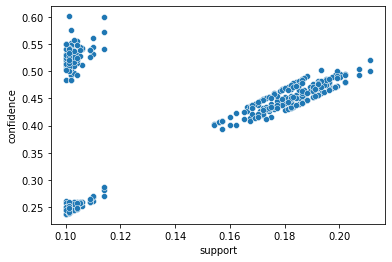

In [20]:
sns.scatterplot(x = "support", y = "confidence", data = filtered_rules)
plt.show()

In [21]:
filtered_rules = rules[(rules['antecedent support'] > 0.02)&
                        (rules['consequent support'] >0.01) &
                        (rules['confidence'] > 0.45) &
                        (rules['lift'] > 1.0)]

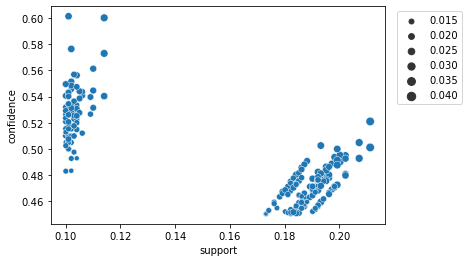

In [22]:
sns.scatterplot(x = "support", y = "confidence", size= 'leverage',data = filtered_rules)
plt.legend(bbox_to_anchor= (1.02, 1), loc='upper left',)
plt.show()

In [23]:
filtered_rules = rules[(rules['antecedent support'] > 0.02)&
                        (rules['consequent support'] >0.01) &
                        (rules['confidence'] > 0.45) &
                        (rules['lift'] > 1.0)&
                        (rules['support']>0.195)]

In [24]:
filtered_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
66,(Butter),(Ice cream),0.420420,0.410410,0.207207,0.492857,1.200889,0.034662,1.162571,0.288629
67,(Ice cream),(Butter),0.410410,0.420420,0.207207,0.504878,1.200889,0.034662,1.170579,0.283728
68,(Butter),(Kidney Beans),0.420420,0.408408,0.202202,0.480952,1.177626,0.030499,1.139764,0.260247
69,(Kidney Beans),(Butter),0.408408,0.420420,0.202202,0.495098,1.177626,0.030499,1.147905,0.254963
70,(Milk),(Butter),0.405405,0.420420,0.198198,0.488889,1.162857,0.027757,1.133960,0.235537
71,(Butter),(Milk),0.420420,0.405405,0.198198,0.471429,1.162857,0.027757,1.124909,0.241639
72,(Butter),(Nutmeg),0.420420,0.401401,0.198198,0.471429,1.174457,0.029441,1.132484,0.256294
73,(Nutmeg),(Butter),0.401401,0.420420,0.198198,0.493766,1.174457,0.029441,1.144884,0.248150
74,(Butter),(Onion),0.420420,0.403403,0.197197,0.469048,1.162726,0.027598,1.123635,0.241472
75,(Onion),(Butter),0.403403,0.420420,0.197197,0.488834,1.162726,0.027598,1.133838,0.234584


In [28]:
def rules_to_coordinates(rules):
    rules['antecedent'] = rules['antecedents'].apply(lambda antecedent:list(antecedent)[0])
    rules['consequent'] = rules['consequents'].apply(lambda consequent:list(consequent)[0])
    rules['rule'] = rules.index
    return rules[['antecedent','consequent','rule']]


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1492\1571138333.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules['antecedent'] = rules['antecedents'].apply(lambda antecedent:list(antecedent)[0])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1492\1571138333.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules['consequent'] = rules['consequents'].apply(lambda consequent:list(consequent)[0])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1492\1571138333.py:4: SettingWithCopyWarning: 
A value is trying 

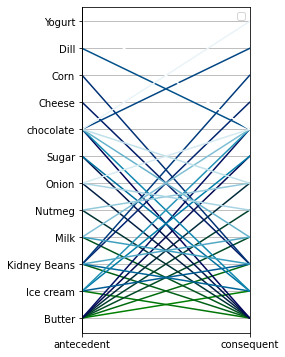

In [29]:
from pandas.plotting import parallel_coordinates
coords = rules_to_coordinates(filtered_rules)
plt.figure(figsize=(3,6))
parallel_coordinates(coords, 'rule',colormap = 'ocean')
plt.legend([])
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1492\1019086969.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1492\1019086969.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1492\1019086969.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1492\1019086969.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1492\1019086969.py:9: UserWarning: Matplotlib is currently using module

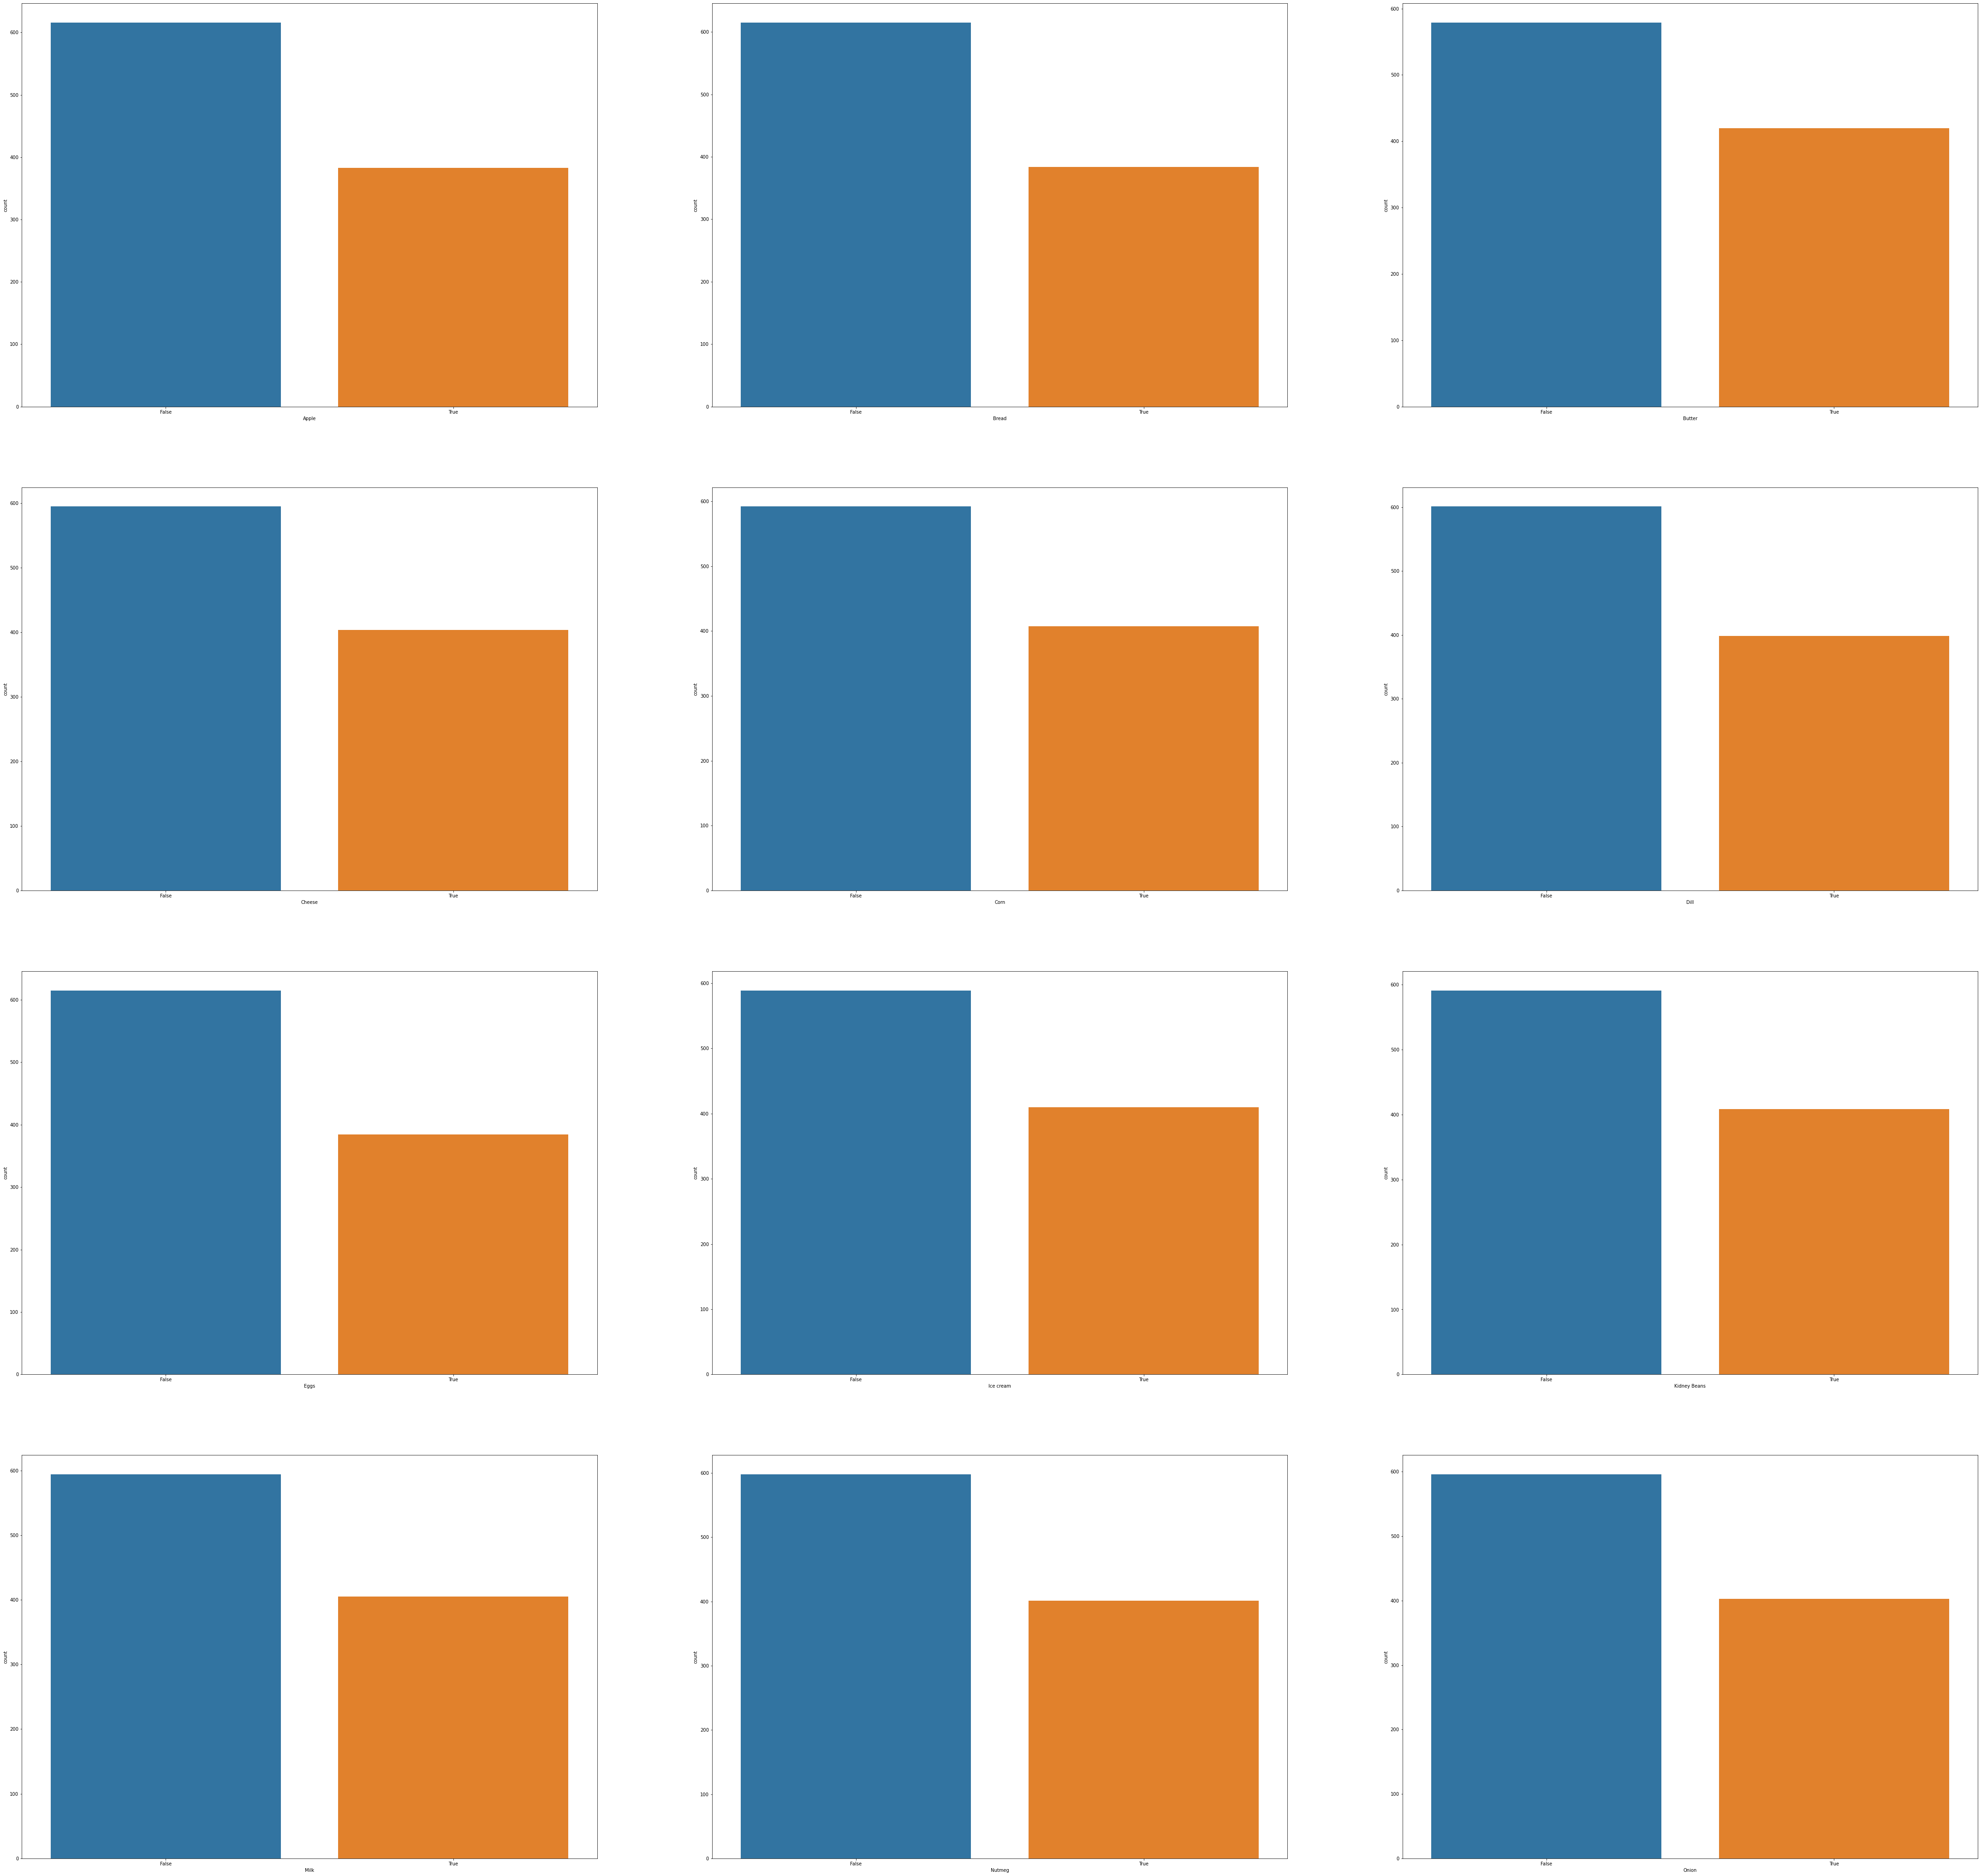

In [30]:
fig,ax=plt.subplots(4,3) 
count=0 
fig.set_figheight(74) 
fig.set_figwidth(76) 
for rows in range(4): 
    for cols in range(3): 
        sns.countplot(data=df,x=df.columns[count],ax=ax[rows][cols]) 
        count+=1 
        fig.show()

In [3]:
import pandas as pd
import joblib

# Load association rules
Rules = joblib.load('association_rules.pkl')

def recommend_items(rules, input_item):
    # Filter rules for the given input item in antecedents
    filtered_rules = rules[rules['antecedents'].apply(lambda x: input_item in x)]
    
    # Sort rules by lift, confidence, and support in descending order
    filtered_rules = filtered_rules.sort_values(by=['lift', 'confidence', 'support'], ascending=False)
    
    # Extract recommended items from consequents column
    recommended_items = filtered_rules['consequents'].tolist()
    
    return set(recommended_items[0]) if recommended_items else set()

def load_association_rules():
    return Rules

def main():
    # Load association rules
    rules = load_association_rules()
    
    # Example user input
    user_input = input("Enter the item you are interested in: ")
    
    # Get recommended items based on user input
    recommended_items = recommend_items(rules, user_input)

    # Display recommended items
    print("Recommended items for", user_input, ":", recommended_items)

if __name__ == "__main__":
    main()


Recommended items for Unicorn, Ice cream : set()


In [4]:
import pandas as pd
import joblib

# Load association rules
Rules = joblib.load('association_rules.pkl')

def recommend_items(rules, input_items):
    recommended_items = set()
    
    for input_item in input_items:
        # Filter rules for the given input item in antecedents
        filtered_rules = rules[rules['antecedents'].apply(lambda x: input_item in x)]
        
        if not filtered_rules.empty:
            # Sort rules by lift, confidence, and support in descending order
            filtered_rules = filtered_rules.sort_values(by=['lift', 'confidence', 'support'], ascending=False)
            
            # Extract recommended items from consequents column
            recommended_items.update(filtered_rules['consequents'].iloc[0])
    
    return recommended_items

def load_association_rules():
    return Rules

def main():
    # Load association rules
    rules = load_association_rules()
    
    # Example user input
    user_input = input("Enter the items you are interested in : ")
    input_items = [item.strip() for item in user_input.split(',')]
    
    # Get recommended items based on user input
    recommended_items = recommend_items(rules, input_items)

    # Display recommended items
    print("Recommended items for", ', '.join(input_items), ":", recommended_items)

if __name__ == "__main__":
    main()


Recommended items for Unicorn, Ice cream : {'Kidney Beans', 'chocolate'}
